<a href="https://colab.research.google.com/github/AlirezaAhadipour/Keras/blob/main/Fashion_mnist%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print('TensorFlow version:', tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

TensorFlow version: 2.11.0


In [2]:
# load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
# scale the input images from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

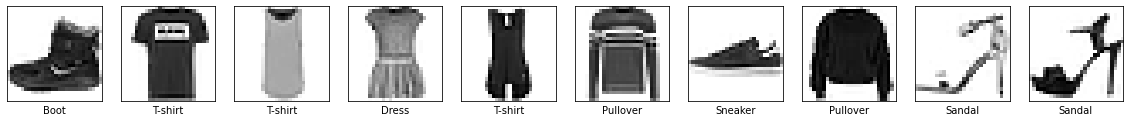

In [9]:
# display the first 10 images in the dataset
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [19]:
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # flaten the 28x28 matrix to a vector of size 784 (28*28)
    tf.keras.layers.Dense(128, activation='relu'), #first hidden layer composed of 128 units (neurons)
    # tf.keras.layers.Dropout(0.2), # 20% dropout
    tf.keras.layers.Dense(10) # output layer with 10 nodes (10 classes)
])

In [20]:
# compile the model
model.compile(optimizer='adam',
              metrics=['accuracy'],
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [21]:
# train the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4955 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3726 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3379 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3115 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2957 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2805 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2681 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2574 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2480 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0

In [18]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.3398 - accuracy: 0.8834 - 888ms/epoch - 3ms/step


In [22]:
# make prediction
# add a softmax layer to the model to generate probabilities
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = prob_model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [23]:
predictions[0] # generates 10 different probabilities representing that to which class does example 0 belong

array([9.8418989e-09, 2.7799982e-09, 4.9323189e-12, 8.6525562e-13,
       1.0262102e-08, 7.5023396e-05, 8.8413614e-08, 1.4365306e-03,
       3.4201495e-08, 9.9848831e-01], dtype=float32)

In [24]:
np.argmax(predictions[0]) # returns the label regarding the maximum probability

9